# Notes of Hidden Markov Model

Haiyang Yu, 2018-09-10

Contents:

- 1. Markov Chain
    + Solving the equelibrium state
    + Absorbing Markov model
- 2. Hidden Markov Model
    + Learning: EM algorithm
    
References:
- https://en.wikipedia.org/wiki/Markov_chain
- https://en.wikipedia.org/wiki/Hidden_Markov_model
- Speech and Language Processing. Daniel Jurafsky & James H. Martin.
- Tenyakov, Anton, "Estimation of Hidden Markov Models and Their Applications in Finance" (2014). Electronic Thesis and Dissertation Repository. 2348.


## 1. Markov Chain

In probability theory and related fields, a Markov process, named after the Russian mathematician **Andrey Markov**, is a stochastic process that satisfies the Markov property (sometimes characterized as "memorylessness"). 

A discrete-time Markov chain is a sequence of random variables $X_1$, $X_2$, ... with the **Markov property**, namely that the probability of moving to the next state depends only on the present state and not on the previous states:

$$ Pr(X_{t+1} = x | X_1=x_1, X_2 = x-2, ..., X_t=x_t) = Pr(X_{t+1}=x|X_t=x_t) $$

$$ \pi_{t+1} = \pi_t A $$
Where, $\pi$ is the probability distribution vector over states, A is the state trasition matrix: $a_{ij} = P(X_{t}=i|X_{t+1}=j)$

Time-homogeneous Markov chain: transition matrix A is time invariant.

Constraint: $\Sigma_i \pi_i = 1, i=1,2,...,n$ (n is the number of states)


### Equilibrium (stationary) distribution

$$\pi = \pi A$$

$$(A-I)^T \pi^T = 0$$

Solve this linear system with constraint $\Sigma \pi_i=1$, we can get the stationary distribution $\pi$.

Perron–Frobenius theorem:

$$\lim_{k \to \infty} A^k = \mathbf{1} \pi$$
Where, $\mathbf{1}$ is the column vector where all entries are 1.


In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from mod_MC import *

[0.625  0.3125 0.0625]
[0.62623785 0.31136835 0.0623938 ]
[0.6227367  0.31456919 0.06269412]
[0.62393798 0.31347059 0.06259143]


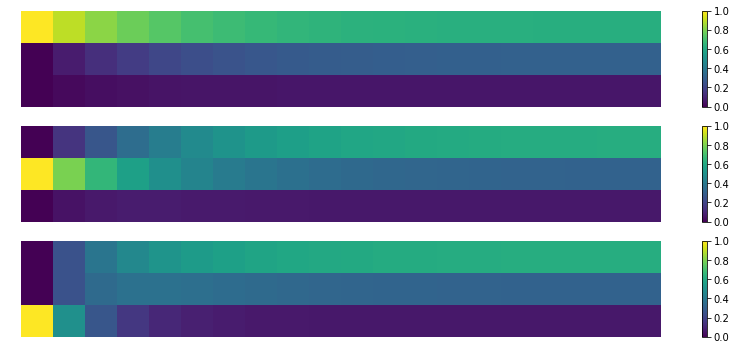

In [2]:
A = np.array([[0.9, 0.075, 0.025], 
             [0.15,   0.8,  0.05], 
             [0.25,  0.25,   0.5]])
print( solve_stationary(A) )

ndim  = 3
ntime = 20
plt.figure(1, figsize=(15,6) )
for k in range(ndim):
    plt.subplot(ndim,1,k+1)
    ps = np.zeros([ntime, ndim])
    ps[0,k] = 1
    for i in range(ntime-1):
        ps[i+1,:] = np.dot(ps[i,:], A)
        
    plt.imshow(ps.T)
    plt.axis('off')
    plt.colorbar()
    print(ps[-1,:])
    
plt.show()


### Absorbing Markov Chain

https://en.wikipedia.org/wiki/Absorbing_Markov_chain

Example: string generation.

Consider the process of repeatedly flipping a fair coin until the sequence (heads, tails, heads) appears. What is the expectation of the number of steps before stopping?


## Hidden Markov Model

Transition equation: $\pi_t = \pi_{t-1} A$

Emission equation: $o_t = \pi_t B$

, where $\pi$ is hidden state distribution, $o$ is observation distribution.

<img src="./hmm01.png">

There foundamental questions:
* Given the model parameters and observed data, calculate the likelihood of the data.
$$ P(Y|\theta), where \ \theta=(A,B) $$
    - Solved by **Forward algorithm**
* Given the model parameters and observed data, estimate the optimal sequence of hidden states.
$$ X^* = argmax[ P(Y|\theta, X) ] $$
    - Solved by **Viterbi algorithm**
    - filtering: $ P(X_T| Y_1, Y_2, ..., Y_T) $    
    - smoothing: $ P(X_t | Y_1, Y_2, ..., Y_T), t<T $    
* Learning: given just the observed data, estimate the model parameters.
$$ \theta^* = argmax[ P(Y|\theta) ] $$
    - Solved by **EM algorithm (Baum-Welch algorithm)**


### Forward Algorithm

**Target**: get the likelihood (probability) of data $P(Y|\theta)$

Suppose we know the hidden (latent) state sequence $X_1, X_2, ..., X_t$, then

$$ P(Y|\theta) = \prod_{k=1}^{T} P(Y_k|X_k) $$

The joint probability of a particular hidden state sequence and observation is:
$$ P(Y, X) = P(Y|X)P(X) = \prod_{k=1}^{T} P(Y_k|X_k) \prod_{k=1}^{T} P(X_k|X_{k-1}) $$

Therefore, the final likelihood (probability) of the observation is summing over all possible hidden state sequences:

$$ P(Y) = \sum_{X} P(Y, X) = \sum_{X} P(Y|X)P(X) $$

Time complexity of greedy algorithm: $O(N^T)$, where N is the number of hidden states.

Dynamic programming: forward algorithm ($O(N^2 T)$)


<img src="./hmm002.png">
<img src="./hmm003.png">


### Viterbi algorithm

**Target**: given the model parameters and observed data, get the best sequence of hidden states

What is the "best"? Maximum Liklihood Estimation: $$ X^* = argmax[ P(Y|\theta, X) ] $$

Greedy algorithm: calculate the likelihood for each possible sequence of hidden states, and choose the largest one. time complexitiy ~ $O(N^T)$

Dynamic programming (Viterbi algoithm): similar with forward algorithm 

<img src="./hmm004.png">

https://en.wikipedia.org/wiki/Viterbi_algorithm

### Baum-Velch algorithm

https://en.wikipedia.org/wiki/Baum%E2%80%93Welch_algorithm
    

1.1436796345927811e-48
[[0.39201057 0.60798943]
 [0.27755968 0.72244032]]
[[0.01838104 0.10835137 0.87275003]
 [0.44118708 0.42971037 0.1148368 ]]


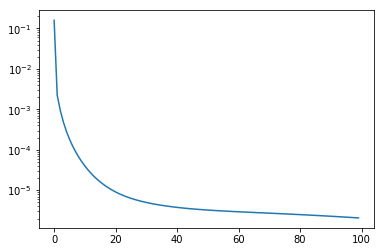

In [44]:
# Example: Consider a village where all villagers are either healthy or have a fever 
# and only the village doctor can determine whether each has a fever. 
# The doctor diagnoses fever by asking patients how they feel. 
# The villagers may only answer that they feel normal, dizzy, or cold.

A = np.array([[0.7, 0.3], 
             [0.4, 0.6]])
B = np.array([[0.1, 0.4, 0.5], 
             [0.6, 0.3, 0.1]])
x, y = HMM_simulation(A, B, nt = 100)

#print(x)
#print(y)
print( forward(A, B, y) )
xguess = viterbi(A, B, y) 
#print(xguess)

from sklearn.metrics import confusion_matrix
import pandas as pd

pd.DataFrame( confusion_matrix(x, xguess) )

Aest, Best, errors = baum_welch(y, nx=2, maxiter=100)
print(Aest)
print(Best)
plt.plot(errors)
plt.yscale('log')